# Covariance and Correlation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [4]:
def mean(x):
    return sum(x) / len(x)

In [5]:
def covariance(x, y):
    x_mean = mean(x)
    y_mean = mean(y)
    data = [(x[i] - x_mean) * (y[i] - y_mean)
            for i in range(len(x))]
    return sum(data) / (len(data) - 1)

In [6]:
M1 = [10., 6.]
M2 = [11., 4.]
M3 = [8., 5.]
M4 = [3., 3.]
M5 = [2., 2.8]
M6 = [1., 1.]

X = np.array([M1,
             M2,
             M3,
             M4,
             M5,
             M6], dtype=float)
print(X)

[[10.   6. ]
 [11.   4. ]
 [ 8.   5. ]
 [ 3.   3. ]
 [ 2.   2.8]
 [ 1.   1. ]]


In [8]:
x = X[:,0]
y = X[:,1]
print(x, ',', y)
print()
print(covariance(x, y))

[10. 11.  8.  3.  2.  1.] , [6.  4.  5.  3.  2.8 1. ]

6.486666666666666


In [9]:
print(X.mean(axis=0))
print(X.var(axis=0, ddof=1))
print(X.std(axis=0, ddof=1))
print("____")

[5.83333333 3.63333333]
[18.96666667  3.12666667]
[4.35507367 1.76823829]
____


$cov(x, y) = \frac{1}{n-1}\sum(x - \bar{x})(y - \bar{y})$

In [10]:
x_ = X[:,0].mean()
y_ = X[:,1].mean()
print(x_, ',', y_)
print()
c = 0
for i in range(len(x)):
    c += (x[i]-x_)*(y[i]-y_)
    
print(c/(len(x)-1))

5.833333333333333 , 3.6333333333333333

6.486666666666666


In [11]:
# covariance calculated with numpy
covariance_matrix = np.cov(X, y=None, rowvar=False, bias=False, ddof=None)
print(covariance_matrix)
print()
print(covariance_matrix[0,1])

[[18.96666667  6.48666667]
 [ 6.48666667  3.12666667]]

6.486666666666666


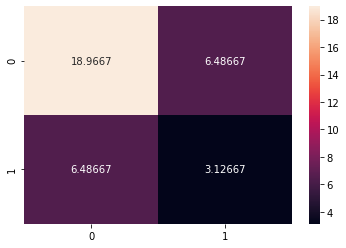

In [19]:
# visual representation of the covariance
sn.heatmap(covariance_matrix, annot=True, fmt='g')
plt.show()

### Computing the eigenvalues and eigenvectors

Covariance: $\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{N}(x_{ij}-\bar{x_j})(x_{ik}-\bar{x_k})$

Coviance matrix: $Σ = \frac{1}{n-1}((X-\bar{x})^T(X-\bar{x}))$

In [20]:
# Eigendecomposition of the covariance
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print("Eigenvector: \n", eigen_vectors, "\n")
print("Eigenvalues: \n", eigen_values, "\n")

Eigenvector: 
 [[ 0.94171069 -0.33642381]
 [ 0.33642381  0.94171069]] 

Eigenvalues: 
 [21.28401224  0.80932109] 



Subtracting the mean $B = X - \bar{X}$

In [21]:
x_ = np.array([[X[:,0].mean()],
             [X[:,1].mean()]]).T
print(x_)
print()
X_ = np.ones(X.shape[0]).reshape(X.shape[0],1) @ x_
B = X - X_
print(B)
print()
C = B.T @ B # covariance matrix of rows of B
print(C)

[[5.83333333 3.63333333]]

[[ 4.16666667  2.36666667]
 [ 5.16666667  0.36666667]
 [ 2.16666667  1.36666667]
 [-2.83333333 -0.63333333]
 [-3.83333333 -0.83333333]
 [-4.83333333 -2.63333333]]

[[94.83333333 32.43333333]
 [32.43333333 15.63333333]]


In [22]:
eigen_values, eigen_vectors = np.linalg.eig(C)
print("Eigenvector: \n", eigen_vectors, "\n")
print("Eigenvalues: \n", eigen_values / (len(X)-1), "\n")

Eigenvector: 
 [[ 0.94171069 -0.33642381]
 [ 0.33642381  0.94171069]] 

Eigenvalues: 
 [21.28401224  0.80932109] 



$correlation(x, y) = \frac{covariance(x,y)}{\sigma_x \sigma_y}$

In [23]:
print(covariance_matrix[0,1])
print(np.std(X[:,0], ddof=1), ',', np.std(X[:,1], ddof=1))
print()

correlation = covariance_matrix[0,1] / (np.std(X[:,0], ddof=1)*np.std(X[:,1], ddof=1))
print(correlation)

6.486666666666666
4.355073669487885 , 1.768238294649979

0.8423358476555067


In [24]:
# Computing directly with numpy for Matrix X ... 
correlation_matrix = np.corrcoef(X, y=None, rowvar=False)
print(correlation_matrix)
print()
print(correlation_matrix[0,1])

[[1.         0.84233585]
 [0.84233585 1.        ]]

0.8423358476555066


In [25]:
# ... or for Matrix B
correlation_matrix = np.corrcoef(B, y=None, rowvar=False)
print(correlation_matrix)
print()
print(correlation_matrix[0,1])

[[1.         0.84233585]
 [0.84233585 1.        ]]

0.8423358476555066
